<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/7%EC%A3%BC%EC%B0%A8/cifar10_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 - 3개 분류하기 (개, 고양이, 말)

In [3]:
#데이터 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os

#경로 설정 (매번 다운로드가 아닌 기존 데이터가 없을 시 저장)
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/cifar10_data'  # CIFAR-10 데이터를 저장할 경로

#데이터 디렉토리 생성
os.makedirs(DATA_DIR, exist_ok=True)

# 데이터 디렉토리 생성
os.makedirs(DATA_DIR, exist_ok=True)

# --- CIFAR-10 로드 (자동으로 캐싱) ---
# Keras는 기본적으로 ~/.keras/datasets에 저장하지만,
# 명시적으로 경로를 지정하려면 아래와 같이 처리
cifar10_path = os.path.join(DATA_DIR,'cifar-10-batches-py')

if os.path.exists(cifar10_path):
    print(f"✓ 기존 데이터 발견: {cifar10_path}")
    print("저장된 데이터를 로드합니다...")
else:
    print(f"데이터가 없습니다. {DATA_DIR}에 다운로드합니다...")

데이터가 없습니다. /content/drive/MyDrive/Colab Notebooks/cifar10_data에 다운로드합니다...


In [5]:
#데이터 불러오기 (없으면 이전 셀을 통해 자동 다운로드 후 캐싱)
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"학습 데이터: {x_train.shape}")
print(f"테스트 데이터: {x_test.shape}\n")

학습 데이터: (50000, 32, 32, 3)
테스트 데이터: (10000, 32, 32, 3)



In [6]:
#클래스 이름 정의
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [7]:
#사용할 클래스 선택 (개, 고양이, 말만 필터링해서 분류하기)
selected_classes = ['cat','dog','horse']
selected_idx = [class_names.index(c)for c in selected_classes]

print(selected_idx)

[3, 5, 7]


In [9]:
#선택한 클래스만 필터링하기
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

print(f"선택된 클래스: {selected_classes}")
print(f"학습 샘플 수: {len(x_train)}")
print(f"테스트 샘플 수: {len(x_test)}\n")

선택된 클래스: ['cat', 'dog', 'horse']
학습 샘플 수: 15000
테스트 샘플 수: 3000



In [11]:
#라벨 재매핑 (0~2)
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)]for y in y_train])
y_test = np.array([label_map[int(y)]for y in y_test])

/tmp/ipython-input-1664819226.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)]for y in y_train])
/tmp/ipython-input-1664819226.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)]for y in y_test])


In [13]:
#데이터 전처리 (정규화)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
#CNN 모델 적용
from tensorflow.keras import Input

model_cnn = models.Sequential([
    Input(shape=(32, 32, 3)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(selected_classes), activation='softmax') # Output layer should have the number of selected classes
])

In [26]:
#CNN 모델 컴파일
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#CNN 모델을 이용한 학습
history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
106/106 - 23s - 216ms/step - accuracy: 0.3313 - loss: 1.0987 - val_accuracy: 0.3133 - val_loss: 1.0989
Epoch 2/10
106/106 - 19s - 180ms/step - accuracy: 0.3276 - loss: 1.0987 - val_accuracy: 0.3133 - val_loss: 1.0987
Epoch 3/10
106/106 - 18s - 168ms/step - accuracy: 0.3265 - loss: 1.0986 - val_accuracy: 0.3133 - val_loss: 1.0988
Epoch 4/10
106/106 - 22s - 205ms/step - accuracy: 0.3310 - loss: 1.0987 - val_accuracy: 0.3133 - val_loss: 1.0989
Epoch 5/10
106/106 - 20s - 185ms/step - accuracy: 0.3356 - loss: 1.0987 - val_accuracy: 0.3133 - val_loss: 1.0989
Epoch 6/10
106/106 - 20s - 191ms/step - accuracy: 0.3356 - loss: 1.0986 - val_accuracy: 0.3133 - val_loss: 1.0989
Epoch 7/10
106/106 - 22s - 210ms/step - accuracy: 0.3356 - loss: 1.0986 - val_accuracy: 0.3133 - val_loss: 1.0988
Epoch 8/10
106/106 - 18s - 168ms/step - accuracy: 0.3356 - loss: 1.0986 - val_accuracy: 0.3133 - val_loss: 1.0988
Epoch 9/10
106/106 - 23s - 217ms/step - accuracy: 0.3356 - loss: 1.0986 - val_accuracy: 

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


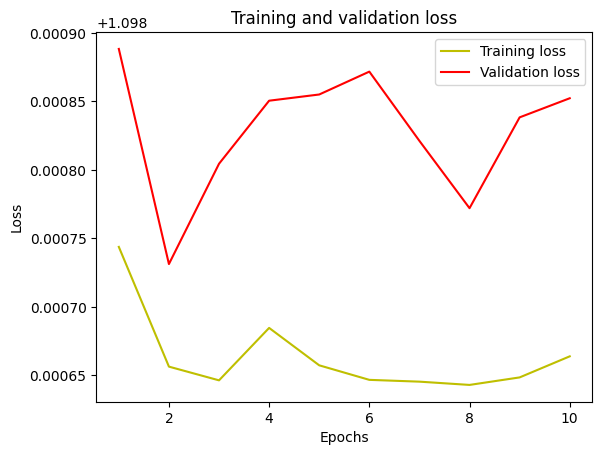

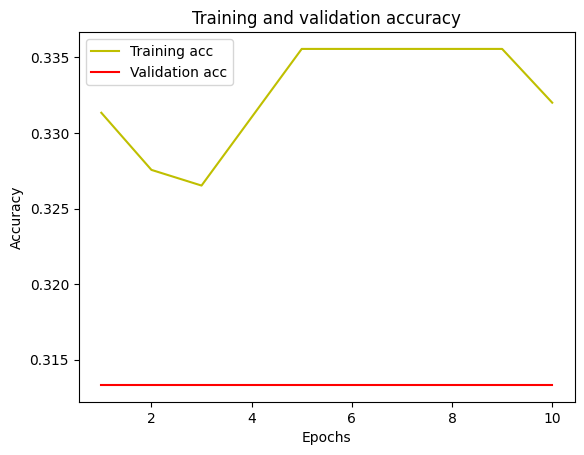

In [28]:
#loss & acc 평가 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']


y_pred = model_cnn.predict(x_test)

y_pred_class = np.argmax(y_pred,axis=1)


loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
예측 결과 (인덱스): [2 2 2 2 2 2 2 2 2 2]
실제 레이블 (인덱스): [0 0 1 2 1 2 2 1 1 1]

예측 결과 (클래스 이름): ['horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse']
실제 레이블 (클래스 이름): ['cat', 'cat', 'dog', 'horse', 'dog', 'horse', 'horse', 'dog', 'dog', 'dog']


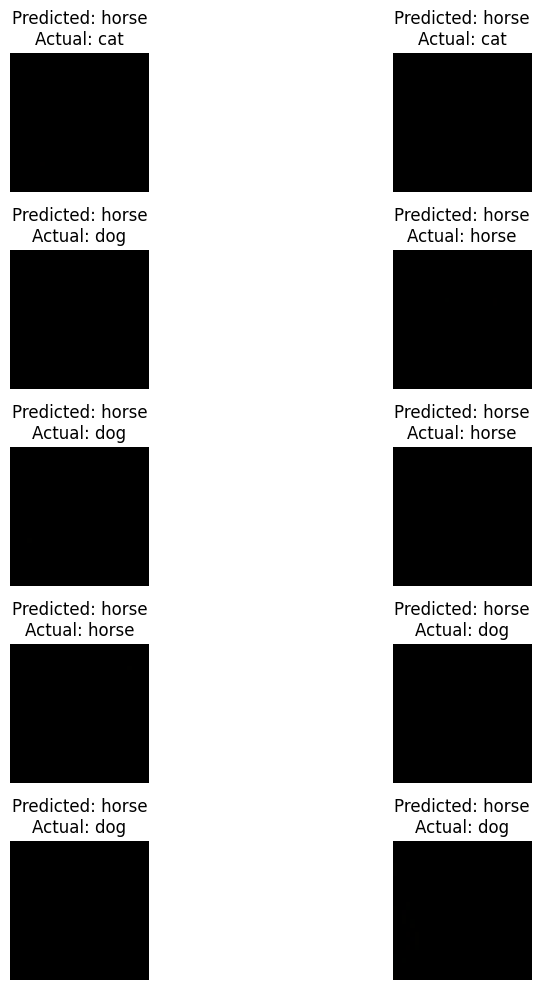

In [30]:
#CNN 예측 결과 비교해보기
import matplotlib.pyplot as plt
import numpy as np

predictions = model_cnn.predict(x_test[:10]) # Predict on the first 10 test images
predicted_classes_indices = np.argmax(predictions, axis=1)

print("예측 결과 (인덱스):", predicted_classes_indices)
print("실제 레이블 (인덱스):", y_test[:10])

# Map indices back to class names for better readability
predicted_classes_names = [selected_classes[i] for i in predicted_classes_indices]
actual_classes_names = [selected_classes[i] for i in y_test[:10]]

print("\n예측 결과 (클래스 이름):", predicted_classes_names)
print("실제 레이블 (클래스 이름):", actual_classes_names)

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predicted_classes_names[i]}\nActual: {actual_classes_names[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()